# ETHZ: 227-0966-00L
# Quantitative Big Imaging

# March 19, 2019

## Supervised Segmentation Approaches
### Anders Kaestner

# Reading Material

- [Introduction to Machine Learning: ETH Course](https://las.inf.ethz.ch/teaching/introml-s18)
- [Decision Forests for Computer Vision and Medical Image Analysis](https://www.amazon.com/Decision-Computer-Analysis-Advances-Recognition/dp/1447149289/ref=sr_1_1?s=books&ie=UTF8&qid=1521704598&sr=1-1&refinements=p_27%3AAntonio+Criminisi&dpID=41fMCWUOh%252BL&preST=_SY291_BO1,204,203,200_QL40_&dpSrc=srch)
- [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)
- [U-Net Website](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)

# Overview
1. Methods
1. Pipelines
2. Classification
3. Regression
4. Segmentation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

# Basic Methods Overview
There are a number of supervised methods we can use for 
 - classification, 
 - regression 
 - and both. 
 
## Workflow of supervised methods 
### Training
- The training phase is when the parameters of the model are *learned* 
- Used training data with ground truth.

### Predicting
- Provides responses on inputs using the trained model.
- Uses new unseen data.


# Basic Methods Overview
There are a number of methods we can use for classification, regression and both. For the simplification of the material we will not make a massive distinction between classification and regression but there are many situations where this is not appropriate. Here we cover a few basic methods, since these are important to understand as a starting point for solving difficult problems. The list is not complete and importantly Support Vector Machines are completely missing which can be a very useful tool in supervised analysis.
A core idea to supervised models is they have a training phase and a predicting phase. 
## Training

The training phase is when the parameters of the model are *learned* and involve putting inputs into the model and updating the parameters so they better match the outputs. This is a sort-of curve fitting (with linear regression it is exactly curve fitting).

## Predicting

The predicting phase is once the parameters have been set applying the model to new datasets. At this point the parameters are no longer adjusted or updated and the model is frozen. Generally it is not possible to tweak a model any more using new data but some approaches (most notably neural networks) are able to handle this. 

# Lets create some data...
Here we create some bivariate data 'blobs' with Gaussian distribution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

blob_data, blob_labels = make_blobs(n_samples=100,
                                    random_state=2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y,
            c=test_pts.group_id,
            cmap='viridis')
test_pts.sample(5)

## Nearest Neighbor (or K Nearest Neighbors)
The technique is as basic as it sounds, it basically finds the nearest point to what you have put in. 

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(test_pts.x, test_pts.y,
            c=test_pts.group_id,
            cmap='viridis')
plt.plot(2,-2,'X',color='cornflowerblue',markersize=10,label='Point A')
plt.plot(7.7,-6.1,'o',color='darkorange',markersize=10,label='Point B')
plt.plot(8.5,-4,'P',color='deeppink',markersize=10,label='Point C')
plt.legend()

## Text example
### Training data
| Value | 1   | 2   | 3   | 4   |
|-------|-----|-----|-----|-----|
| Class | I   | am  | a   | dog |

### Start the training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k_class = KNeighborsClassifier(1)
k_class.fit(X=np.reshape([0, 1, 2, 3], (-1, 1)),
            y=['I', 'am', 'a', 'dog'])

## Nearest neighbor predictions
### Basic test
Same values as training

In [ ]:
print(k_class.predict(np.reshape([0, 1, 2, 3],
                                 (-1, 1))))

### Testing with different values

In [ ]:
print("Input 1.5 :",k_class.predict(np.reshape([1.5], (1, 1))))
print("Input 100 :",k_class.predict(np.reshape([100], (1, 1))))

## Let's come back to the blob data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

blob_data, blob_labels = make_blobs(n_samples=100,
                                    cluster_std=2.0,
                                    random_state=2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')
test_pts.sample(5)

## Training the model using one neighbor


In [ ]:
k_class = KNeighborsClassifier(1)
k_class.fit(test_pts[['x', 'y']], test_pts['group_id']) 

### Resulting prediction map for a single neighbor

In [ ]:
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 30),np.linspace(test_pts.y.min(), test_pts.y.max(), 30),indexing='ij');
grid_pts = pd.DataFrame(dict(x=xx.ravel(), y=yy.ravel()))
grid_pts['predicted_id'] = k_class.predict(grid_pts[['x', 'y']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis'); ax1.set_title('Training Data');
ax2.scatter(grid_pts.x, grid_pts.y, c=grid_pts.predicted_id, cmap='viridis'); ax2.set_title('Testing Points');

## Stabilizing Results - Increase number of neighbors
- We can see here that the result is thrown off by single points
- Prediction can be improved by using more than the nearest neighbor

In [ ]:
k_class = KNeighborsClassifier(4)
k_class.fit(test_pts[['x', 'y']], test_pts['group_id'])
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 30),
                     np.linspace(test_pts.y.min(), test_pts.y.max(), 30),
                     indexing='ij'
                     )
grid_pts = pd.DataFrame(dict(x=xx.ravel(), y=yy.ravel()))
grid_pts['predicted_id'] = k_class.predict(grid_pts[['x', 'y']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis'); ax1.set_title('Training Data');
ax2.scatter(grid_pts.x, grid_pts.y, c=grid_pts.predicted_id, cmap='viridis');ax2.set_title('Testing Points with 4 neighbors');

# Linear Regression
- Linear regression is a fancy-name for linear curve fitting
- Fitting a line through points (sometimes in more than one dimension). 
- It is a very basic method, 
    - is easy to understand, 
    - interpret 
    - and fast to compute

## We need data to fit...

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40] )
plt.plot(x,y,'o',color='cornflowerblue'); plt.title('Training data')
l_reg = LinearRegression()
l_reg.fit(X=np.reshape(x, (-1, 1)),y=y)
print("slope: {0:0.4}, intercept: {1:0.4}".format(l_reg.coef_[0], l_reg.intercept_))

## Let's try the model on some data points

In [ ]:
print('An array of values:',l_reg.predict(np.reshape([0, 1, 2, 3], (-1, 1))))
print('x:',-100, '=>', l_reg.predict(np.reshape([-100], (1, 1))))
print('x: ',500, '=>', l_reg.predict(np.reshape([500], (1, 1))))

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
blob_data, blob_labels = make_blobs(centers=2, n_samples=100,
                                    random_state=2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')
test_pts.sample(5)

In [ ]:
l_reg = LinearRegression()
l_reg.fit(test_pts[['x', 'y']], test_pts['group_id'])
print('Slope', l_reg.coef_)
print('Offset', l_reg.intercept_)

In [ ]:
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 20),
                     np.linspace(test_pts.y.min(), test_pts.y.max(), 20),
                     indexing='ij'
                     )
grid_pts = pd.DataFrame(dict(x=xx.ravel(), y=yy.ravel()))
grid_pts['predicted_id'] = l_reg.predict(grid_pts[['x', 'y']])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')
ax1.set_title('Training Data')
ax2.scatter(grid_pts.x, grid_pts.y, c=grid_pts.predicted_id, cmap='viridis')
ax2.set_title('Testing Points')
ax3.imshow(grid_pts.predicted_id.values.reshape(
    xx.shape).T[::-1], cmap='viridis')
ax3.set_title('Test Image');

## Trees

[Hastie et al., Elements Of Statistical Learning, 2009](https://doi.org/10.1007/978-0-387-84858-7) Section 9.2 Trees.

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


def show_tree(in_tree):
    return graphviz.Source(export_graphviz(in_tree, out_file=None))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
d_tree = DecisionTreeClassifier()
d_tree.fit(X=np.reshape([0, 1, 2, 3], (-1, 1)),
           y=[0, 1, 0, 1])

In [ ]:
show_tree(d_tree)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

blob_data, blob_labels = make_blobs(n_samples=100,
                                    random_state=2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)

cell_text = []
for row in range(5):
    cell_text.append(test_pts.sample(5).iloc[row])

plt.table(cellText=cell_text, colLabels=test_pts.columns, loc='center')
plt.axis('off')

plt.subplot(1,2,2)
plt.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')


In [ ]:
d_tree = DecisionTreeClassifier()
d_tree.fit(test_pts[['x', 'y']],
           test_pts['group_id'])
show_tree(d_tree)

In [ ]:
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 20),
                     np.linspace(test_pts.y.min(), test_pts.y.max(), 20),
                     indexing='ij'
                     )
grid_pts = pd.DataFrame(dict(x=xx.ravel(), y=yy.ravel()))
grid_pts['predicted_id'] = d_tree.predict(grid_pts[['x', 'y']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')
ax1.set_title('Training Data')
ax2.scatter(grid_pts.x, grid_pts.y, c=grid_pts.predicted_id, cmap='viridis')
ax2.set_title('Testing Points')

## Forests
Forests are basically the idea of taking a number of trees and bringing them together. So rather than taking a single tree to do the classification, you divide the samples and the features to make different trees and then combine the results. One of the more successful approaches is called [Random Forests](https://en.wikipedia.org/wiki/Random_forest) or as a [video](https://www.youtube.com/watch?v=loNcrMjYh64)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

blob_data, blob_labels = make_blobs(n_samples=1000,
                                    cluster_std=3,
                                    random_state=2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=5, random_state=2018)
rf_class.fit(test_pts[['x', 'y']],
             test_pts['group_id'])
print('Build ', len(rf_class.estimators_), 'decision trees')

In [ ]:
show_tree(rf_class.estimators_[0])

In [ ]:
show_tree(rf_class.estimators_[1])

In [ ]:
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 20),
                     np.linspace(test_pts.y.min(), test_pts.y.max(), 20),
                     indexing='ij'
                     )
grid_pts = pd.DataFrame(dict(x=xx.ravel(), y=yy.ravel()))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 3), dpi=150)
ax1.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')
ax1.set_title('Training Data')
ax2.scatter(grid_pts.x, grid_pts.y, c=rf_class.predict(
    grid_pts[['x', 'y']]), cmap='viridis')
ax2.set_title('Random Forest Classifier')

ax3.scatter(grid_pts.x, grid_pts.y, c=rf_class.estimators_[
            0].predict(grid_pts[['x', 'y']]), cmap='viridis')
ax3.set_title('First Decision Tree')

ax4.scatter(grid_pts.x, grid_pts.y, c=rf_class.estimators_[
            1].predict(grid_pts[['x', 'y']]), cmap='viridis')
ax4.set_title('Second Decision Tree')

# Pipelines

We will use the idea of pipelines generically here to refer to the combination of steps that need to be performed to solve a problem. 

In [ ]:
%%file pipe_utils.py
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from skimage.filters import laplace, gaussian, median
from skimage.util import montage as montage2d
import matplotlib.pyplot as plt



def display_data(in_ax, raw_data, show_hist):
    if (raw_data.shape[0] == 1) and (len(raw_data.shape) == 4):
        # reformat channels first
        in_data = raw_data[0].swapaxes(0, 2).swapaxes(1, 2)
    else:
        in_data = np.squeeze(raw_data)
    if len(in_data.shape) == 1:
        if show_hist:
            in_ax.hist(in_data)
        else:
            in_ax.plot(in_data, 'r.')
    elif len(in_data.shape) == 2:
        if show_hist:
            for i in range(in_data.shape[1]):
                in_ax.hist(in_data[:, i], label='Dim:{}'.format(i), alpha=0.5)
            in_ax.legend()
        else:
            if in_data.shape[1] == 2:
                in_ax.plot(in_data[:, 0], in_data[:, 1], 'r.')
            else:
                in_ax.plot(in_data, '.')
    elif len(in_data.shape) == 3:
        if show_hist:
            in_ax.hist(in_data.ravel())
        else:
            n_stack = np.stack([(x-x.mean())/x.std() for x in in_data], 0)
            in_ax.imshow(montage2d(n_stack))


def show_pipe(pipe, in_data, show_hist=False):
    m_rows = np.ceil((len(pipe.steps)+1)/3).astype(int)
    fig, t_axs = plt.subplots(m_rows, 3, figsize=(12, 5*m_rows))
    m_axs = t_axs.flatten()
    [c_ax.axis('off') for c_ax in m_axs]
    last_data = in_data
    for i, (c_ax, (step_name, step_op)) in enumerate(zip(m_axs, [('Input Data', None)]+pipe.steps), 1):
        if step_op is not None:
            try:
                last_data = step_op.transform(last_data)
            except AttributeError:
                try:
                    last_data = step_op.predict_proba(last_data)
                except AttributeError:
                    last_data = step_op.predict(last_data)

        display_data(c_ax, last_data, show_hist)
        c_ax.set_title('Step {} {}\n{}'.format(i, last_data.shape, step_name))
        c_ax.axis('on')


def flatten_func(x): return np.reshape(x, (np.shape(x)[0], -1))


flatten_step = FunctionTransformer(flatten_func, validate=False)


def px_flatten_func(in_x):
    if len(in_x.shape) == 2:
        x = np.expand_dims(in_x, -1)
    elif len(in_x.shape) == 3:
        x = in_x
    elif len(in_x.shape) == 4:
        x = in_x
    else:
        raise ValueError(
            'Cannot work with images with dimensions {}'.format(in_x.shape))
    return np.reshape(x, (-1, np.shape(x)[-1]))


px_flatten_step = FunctionTransformer(px_flatten_func, validate=False)


def add_filters(in_x, filt_func=[lambda x: gaussian(x, sigma=2),
                                 lambda x: gaussian(
                                     x, sigma=5)-gaussian(x, sigma=2),
                                 lambda x: gaussian(x, sigma=8)-gaussian(x, sigma=5)]):
    if len(in_x.shape) == 2:
        x = np.expand_dims(np.expand_dims(in_x, 0), -1)
    elif len(in_x.shape) == 3:
        x = np.expand_dims(in_x, -1)
    elif len(in_x.shape) == 4:
        x = in_x
    else:
        raise ValueError(
            'Cannot work with images with dimensions {}'.format(in_x.shape))
    n_img, x_dim, y_dim, c_dim = x.shape
    out_imgs = [x]
    for c_filt in filt_func:
        out_imgs += [np.stack([np.stack([c_filt(x[i, :, :, j])
                                         for i in range(n_img)], 0)
                               for j in range(c_dim)], -1)]

    return np.concatenate(out_imgs, -1)


filter_step = FunctionTransformer(add_filters, validate=False)


def add_xy_coord(in_x, polar=False):
    if len(in_x.shape) == 2:
        x = np.expand_dims(np.expand_dims(in_x, 0), -1)
    elif len(in_x.shape) == 3:
        x = np.expand_dims(in_x, -1)
    elif len(in_x.shape) == 4:
        x = in_x
    else:
        raise ValueError(
            'Cannot work with images with dimensions {}'.format(in_x.shape))
    n_img, x_dim, y_dim, c_dim = x.shape

    _, xx, yy, _ = np.meshgrid(np.arange(n_img),
                               np.arange(x_dim),
                               np.arange(y_dim),
                               [1],
                               indexing='ij')
    if polar:
        rr = np.sqrt(np.square(xx-xx.mean())+np.square(yy-yy.mean()))
        th = np.arctan2(yy-yy.mean(), xx-xx.mean())
        return np.concatenate([x, rr, th], -1)
    else:
        return np.concatenate([x, xx, yy], -1)


xy_step = FunctionTransformer(add_xy_coord, validate=False)
polar_step = FunctionTransformer(
    lambda x: add_xy_coord(x, polar=True), validate=False)


def fit_img_pipe(in_pipe, in_x, in_y):
    in_pipe.fit(in_x,
                px_flatten_func(in_y)[:, 0])

    def predict_func(new_x):
        x_dim, y_dim = new_x.shape[0:2]
        return in_pipe.predict(new_x).reshape((x_dim, y_dim, -1))
    return predict_func

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline


blob_data, blob_labels = make_blobs(n_samples=100,
                                    random_state=2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
cell_text = []
for row in range(5):
    cell_text.append(test_pts.sample(5).iloc[row])

ax1.table(cellText=cell_text, colLabels=test_pts.columns, loc='center')
ax1.axis('off')

ax2.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')

In [ ]:
from pipe_utils import show_pipe
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
simple_pipe = Pipeline([('Normalize', RobustScaler())])
simple_pipe.fit(test_pts)

show_pipe(simple_pipe, test_pts.values)
show_pipe(simple_pipe, test_pts.values, show_hist=True)

In [ ]:
from sklearn.preprocessing import QuantileTransformer
longer_pipe = Pipeline([('Quantile', QuantileTransformer(2)),
                        ('Normalize', RobustScaler())
                        ])
longer_pipe.fit(test_pts)

show_pipe(longer_pipe, test_pts.values)
show_pipe(longer_pipe, test_pts.values, show_hist=True)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
messy_pipe = Pipeline([
    ('Normalize', RobustScaler()),
    ('PolynomialFeatures', PolynomialFeatures(2)),
])
messy_pipe.fit(test_pts)

show_pipe(messy_pipe, test_pts.values)
show_pipe(messy_pipe, test_pts.values, show_hist=True)

# Classification

A common problem of putting images into categories. 
- The standard problem for this is classifying digits between 0 and 9 (MNIST).
- Fundamentally a classification problem is one where we are taking a large input (images, vectors, ...) and trying to put it into a category. 
    - Cats, Dogs
    - Cars, boats
    - etc.
    



# Lets load some images
- Numbers 0 to 9
- 8 $\times$ 8 pixels
- 50 Samples

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from pipe_utils import show_pipe
%matplotlib inline
digit_ds = load_digits(return_X_y=False)
img_data = digit_ds.images[:50]
digit_id = digit_ds.target[:50]
print('Image Data', img_data.shape)

# Run a preprocessing pipline
- Flatten images 8 $\times$ 8 $\rightarrow$ 1 $\times$ 64
- Normalize (robust scaling)

In [ ]:
from pipe_utils import flatten_step
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
digit_pipe = Pipeline([('Flatten', flatten_step),
                       ('Normalize', RobustScaler())])
digit_pipe.fit(img_data)

show_pipe(digit_pipe, img_data)
show_pipe(digit_pipe, img_data, show_hist=True)

# Add a classifier
- Add a K Nearest Neighbours classifier to the pipeline (K=1)
- Run the fit

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

digit_class_pipe = Pipeline([('Flatten', flatten_step),
                             ('Normalize', RobustScaler()),
                             ('NearestNeighbor', KNeighborsClassifier(1))])
digit_class_pipe.fit(img_data, digit_id)

show_pipe(digit_class_pipe, img_data)

# Test classifier performance
Let's test with traning data

In [ ]:
from sklearn.metrics import accuracy_score
pred_digit = digit_class_pipe.predict(img_data)
print('{0}% accuracy'.format(100*accuracy_score(digit_id, pred_digit)))

# How about the confusion matrix?

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8), dpi=100)
sns.heatmap(
    confusion_matrix(digit_id, pred_digit),
    annot=True,
    fmt='d',
    ax=ax1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(digit_id, pred_digit))

# Wow! We've built an amazing algorithm!

<img src="../common/figures/nailedit.png" style="height:300px">

## Let's patent it! Call Google!

# Let's try again
Using new, unseen data

In [ ]:
test_digit = np.array([[[0.,  0.,  6., 12., 13.,  6.,  0.,  0.],
                        [0.,  6., 16.,  9., 12., 16.,  2.,  0.],
                        [0.,  7., 16.,  9., 15., 13.,  0.,  0.],
                        [0.,  0., 11., 15., 16.,  4.,  0.,  0.],
                        [0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
                        [0.,  0.,  3., 16.,  4.,  0.,  0.,  0.],
                        [0.,  0.,  1., 16.,  2.,  0.,  0.,  0.],
                        [0.,  0.,  6., 11.,  0.,  0.,  0.,  0.]]])
plt.matshow(test_digit[0], cmap='bone')
print('Prediction:', digit_class_pipe.predict(test_digit))
print('Real Value:', 9)

# Training, Validation, and Testing

## Avoid the training crime in ML
<table>
    <tr><td><img src="../common/figures/jail.png" style="height:300px"></td>
<td>
        
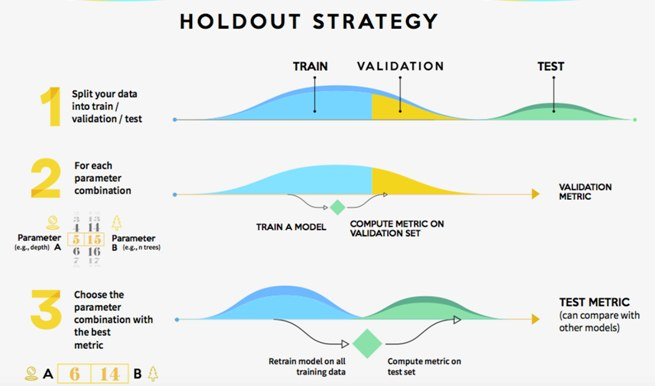
        
 </td></tr></table>

https://www.kdnuggets.com/2017/08/dataiku-predictive-model-holdout-cross-validation.html

# Regression
For regression, we can see 
- it is very similarly to a classification 
    - Predicts the category
    
- instead of trying to output discrete classes we can output on a continuous scale. 
    - Predicts the __actual decimal number__.



In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pipe_utils import show_pipe, flatten_step
%matplotlib inline
digit_ds = load_digits(return_X_y=False)

img_data = digit_ds.images[:50]
digit_id = digit_ds.target[:50]

valid_data = digit_ds.images[50:500]
valid_id = digit_ds.target[50:500]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

digit_regress_pipe = Pipeline([('Flatten', flatten_step),
                               ('Normalize', RobustScaler()),
                               ('NearestNeighbor', KNeighborsRegressor(1))])
digit_regress_pipe.fit(img_data, digit_id)

show_pipe(digit_regress_pipe, img_data)

# Assessment
We can't use accuracy, ROC, precision, recall or any of these factors anymore since we don't have binary / true-or-false conditions we are trying to predict. We know have to go back to some of the initial metrics we covered in the first lectures.

$$ MSE = \frac{1}{N}\sum \left(y_{predicted} - y_{actual}\right)^2 $$
$$ MAE = \frac{1}{N}\sum |y_{predicted} - y_{actual}| $$

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)
pred_train = digit_regress_pipe.predict(img_data)
jitter = lambda x: x+0.25*np.random.uniform(-1, 1, size=x.shape)
sns.swarmplot(digit_id, jitter(pred_train), ax=ax1)
ax1.set_title('Predictions (Training)\nMSE: %2.2f MAE: %2.2f' % (np.mean(np.square(pred_train-digit_id)),
                                                                 np.mean(np.abs(pred_train-digit_id))))

pred_valid = digit_regress_pipe.predict(valid_data)
sns.swarmplot(valid_id, jitter(pred_valid), ax=ax2)
ax2.set_title('Predictions (Validation)\nMSE: %2.2f MAE: %2.2f' % (np.mean(np.square(pred_valid-valid_id)),
                                                                   np.mean(np.abs(pred_valid-valid_id))))

## Increasing neighbor count

In [ ]:
digit_regress_pipe = Pipeline([('Flatten', flatten_step),
                               ('Normalize', RobustScaler()),
                               ('NearestNeighbor', KNeighborsRegressor(2))])
digit_regress_pipe.fit(img_data, digit_id)

show_pipe(digit_regress_pipe, img_data)

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=200)
pred_train = digit_regress_pipe.predict(img_data)

sns.swarmplot(digit_id, jitter(pred_train), ax=ax1)
ax1.set_title('Predictions (Training)\nMSE: %2.2f MAE: %2.2f' % (np.mean(np.square(pred_train-digit_id)),
                                                                 np.mean(np.abs(pred_train-digit_id))))

pred_valid = digit_regress_pipe.predict(valid_data)
sns.swarmplot(valid_id, jitter(pred_valid), ax=ax2)
ax2.set_title('Predictions (Validation)\nMSE: %2.2f MAE: %2.2f' % (np.mean(np.square(pred_valid-valid_id)),
                                                                   np.mean(np.abs(pred_valid-valid_id))));

# Segmentation (Pixel Classification)

### Previously
Predict something based on the information in the image
- Single class (classification)
- Values (regression)

### Segmentation
Now we want to change problem:
- instead of assigning a single class for each image, 
- we want a class or value for each pixel. 

This requires that we restructure the problem.

# Where segmentation fails: Mitochondria Segmentation in EM

<img src="../common/data/em_image.png" style="height:400px" />

- The mitocondria are visible and humans easily spot them
- Other structures have same gray levels
- SNR is not ideal

*** 

- A simple threshold is insufficient to finding the mitocondria structures
- Other filtering techniques are unlikely to magicially fix this problem


# Let's try some methods to segment the mitochondria image

### Decision trees
- DecisionTreeRegressor
- DecisionTreeRegressor with position

### Random forests
* Random forest + KMeans
* Random forest + polynomials
* Random forest + Filters 

### Linear regression
* Neighborhood

### Nearest neighbor
* KNeighborsRegressor

### U-Net

# Loading the mitchondria image and mask
First we need image data for:
- Training
- Validation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline
cell_img = (imread("../common/data/em_image.png")[::2, ::2])/255.0
cell_seg = imread("../common/data/em_image_seg.png",
                  as_gray=True)[::2, ::2] > 0
np.random.seed(2018)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), dpi=72)
ax1.imshow(cell_img, cmap='bone'); ax1.set_title("EM image ({0}x{1})".format(cell_img.shape[0],cell_img.shape[1]))
ax2.imshow(cell_seg, cmap='bone'); ax2.set_title("Mask image ({0}x{1})".format(cell_seg.shape[0],cell_seg.shape[1]));

# Training and validation data
We only have one image available...

__Solution:__ Split it into two parts!

In [ ]:
train_img, valid_img = cell_img[:, :256], cell_img[:, 256:]
train_mask, valid_mask = cell_seg[:, :256], cell_seg[:, 256:]

fig, ((ax1, ax2,ax3, ax4)) = plt.subplots(1, 4, figsize=(15, 5), dpi=100)
ax1.imshow(train_img, cmap='bone');  ax1.set_title('Train Image ({0}x{1})'.format(train_img.shape[0],train_img.shape[1]))
ax2.imshow(train_mask, cmap='bone'); ax2.set_title('Train Mask ({0}x{1})'.format(train_mask.shape[0],train_mask.shape[1]))

ax3.imshow(valid_img,  cmap='bone'); ax3.set_title('Validation Image ({0}x{1})'.format(valid_img.shape[0],valid_img.shape[1]))
ax4.imshow(valid_mask, cmap='bone'); ax4.set_title('Validation Mask ({0}x{1})'.format(valid_mask.shape[0],valid_mask.shape[1]))

# Try a Regression tree

In [ ]:
from pipe_utils import px_flatten_step, show_pipe, fit_img_pipe
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf_seg_model = Pipeline([('Pixel Flatten', px_flatten_step),
                         ('Robust Scaling', RobustScaler()),
                         ('Decision Tree', DecisionTreeRegressor())
                         ])

pred_func = fit_img_pipe(rf_seg_model, train_img, train_mask)
show_pipe(rf_seg_model, train_img)
show_tree(rf_seg_model.steps[-1][1])

In [ ]:
fig, ((ax1, ax5, ax2), (ax3, ax6, ax4)) = plt.subplots(
    2, 3, figsize=(12, 8), dpi=72)
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')

ax5.imshow(train_mask, cmap='viridis')
ax5.set_title('Train Mask')

ax2.imshow(pred_func(train_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax2.set_title('Prediction Mask')

ax3.imshow(cell_img, cmap='bone')
ax3.set_title('Full Image')

ax6.imshow(cell_seg, cmap='viridis')
ax6.set_title('Full Mask')

ax4.imshow(pred_func(cell_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Prediction Mask')

# Regression tree with _position information_

In [ ]:
from pipe_utils import xy_step

rf_xyseg_model = Pipeline([('Add XY', xy_step),
                           ('Pixel Flatten', px_flatten_step),
                           ('Normalize', RobustScaler()),
                           ('DecisionTree', DecisionTreeRegressor(
                               min_samples_split=1000))
                           ])

pred_func = fit_img_pipe(rf_xyseg_model, train_img, train_mask)
show_pipe(rf_xyseg_model, train_img)
show_tree(rf_xyseg_model.steps[-1][1])

# Did we improve the segmentation performance?

In [ ]:
fig, ((ax1, ax5, ax2), (ax3, ax6, ax4)) = plt.subplots(2, 3, figsize=(12, 8), dpi=72)
ax1.imshow(train_img, cmap='bone');ax1.set_title('Train Image')
ax5.imshow(train_mask, cmap='viridis'); ax5.set_title('Train Mask')
ax2.imshow(pred_func(train_img)[:, :, 0], cmap='viridis', vmin=0, vmax=1); ax2.set_title('Prediction Mask')
ax3.imshow(cell_img, cmap='bone'); ax3.set_title('Full Image')
ax6.imshow(cell_seg, cmap='viridis'); ax6.set_title('Full Mask')
ax4.imshow(pred_func(cell_img)[:, :, 0], cmap='viridis', vmin=0, vmax=1);ax4.set_title('Prediction Mask');

# Combine K-Means and Random Forest Regression 

In [ ]:
from sklearn.cluster import KMeans
rf_xyseg_k_model = Pipeline([('Add XY', xy_step),
                             ('Pixel Flatten', px_flatten_step),
                             ('Normalize', RobustScaler()),
                             ('KMeans', KMeans(4)),
                             ('RandomForest', RandomForestRegressor(n_estimators=25))
                             ])

pred_func = fit_img_pipe(rf_xyseg_k_model, train_img, train_mask)
show_pipe(rf_xyseg_k_model, train_img)

In [ ]:
fig, ((ax1, ax5, ax2), (ax3, ax6, ax4)) = plt.subplots(
    2, 3, figsize=(12, 8), dpi=72)
ax1.imshow(train_img, cmap='bone'); ax1.set_title('Train Image')
ax5.imshow(train_mask, cmap='viridis'); ax5.set_title('Train Mask')
ax2.imshow(pred_func(train_img)[:, :, 0], cmap='viridis', vmin=0, vmax=1); ax2.set_title('Prediction Mask')
ax3.imshow(cell_img, cmap='bone'); ax3.set_title('Full Image')
ax6.imshow(cell_seg, cmap='viridis'); ax6.set_title('Full Mask')
ax4.imshow(pred_func(cell_img)[:, :, 0], cmap='viridis', vmin=0, vmax=1); ax4.set_title('Prediction Mask');

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
rf_xyseg_py_model = Pipeline([('Add XY', xy_step),
                              ('Pixel Flatten', px_flatten_step),
                              ('Normalize', RobustScaler()),
                              ('Polynomial Features', PolynomialFeatures(2)),
                              ('RandomForest', RandomForestRegressor(n_estimators=25))
                              ])

pred_func = fit_img_pipe(rf_xyseg_py_model, train_img, train_mask)
show_pipe(rf_xyseg_py_model, train_img)

In [ ]:
fig, ((ax1, ax5, ax2), (ax3, ax6, ax4)) = plt.subplots(
    2, 3, figsize=(12, 8), dpi=72)
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')

ax5.imshow(train_mask, cmap='viridis')
ax5.set_title('Train Mask')

ax2.imshow(pred_func(train_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax2.set_title('Prediction Mask')

ax3.imshow(cell_img, cmap='bone')
ax3.set_title('Full Image')

ax6.imshow(cell_seg, cmap='viridis')
ax6.set_title('Full Mask')

ax4.imshow(pred_func(cell_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Prediction Mask')

# Adding Smarter Features
Here we add images with filters based on Gaussians

In [ ]:
import scipy.stats as stats 
x=np.linspace(-25,25,200)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=[15,4])
ax1.plot(x,stats.norm.pdf(x,0,2)); ax1.set_title("Gaussian $\sigma$=2");
ax2.plot(x,stats.norm.pdf(x,0,5)-stats.norm.pdf(x,0,2)), ax2.set_title("Gaussian $\sigma$=5 - Gaussian $\sigma$=2");
ax3.plot(x,stats.norm.pdf(x,0,8)-stats.norm.pdf(x,0,5)), ax3.set_title("Gaussian $\sigma$=8 - Gaussian $\sigma$=5");

## Pipeline with filters

In [ ]:
from pipe_utils import filter_step
rf_filterseg_model = Pipeline([('Filters', filter_step),
                               ('Pixel Flatten', px_flatten_step),
                               ('Normalize', RobustScaler()),
                               ('RandomForest', RandomForestRegressor(n_estimators=25))
                               ])

pred_func = fit_img_pipe(rf_filterseg_model, train_img, train_mask)
show_pipe(rf_filterseg_model, train_img)

In [ ]:
fig, ((ax1, ax5, ax2), (ax3, ax6, ax4)) = plt.subplots(
    2, 3, figsize=(12, 8), dpi=72)
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')

ax5.imshow(train_mask, cmap='viridis')
ax5.set_title('Train Mask')

ax2.imshow(pred_func(train_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax2.set_title('Prediction Mask')

ax3.imshow(cell_img, cmap='bone')
ax3.set_title('Full Image')

ax6.imshow(cell_seg, cmap='viridis')
ax6.set_title('Full Mask')

ax4.imshow(pred_func(cell_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Prediction Mask')

## Using the Neighborhood
We can also include the whole neighborhood 
- shifting the image in x and y by $\pm$1 pixel. 
- Gives nine feature images

For the first example we will then use __linear regression__ so we can see the exact coefficients that result.

In [ ]:
from sklearn.preprocessing import FunctionTransformer


def add_neighborhood(in_x, x_steps=3, y_steps=3):
    if len(in_x.shape) == 2:
        x = np.expand_dims(np.expand_dims(in_x, 0), -1)
    elif len(in_x.shape) == 3:
        x = np.expand_dims(in_x, -1)
    elif len(in_x.shape) == 4:
        x = in_x
    else:
        raise ValueError(
            'Cannot work with images with dimensions {}'.format(in_x.shape))
    n_img, x_dim, y_dim, c_dim = x.shape
    out_imgs = []
    for i in range(-x_steps, x_steps+1):
        for j in range(-y_steps, y_steps+1):
            out_imgs += [np.roll(np.roll(x,
                                         axis=1, shift=i),
                                 axis=2,
                                 shift=j)]
    return np.concatenate(out_imgs, -1)


def neighbor_step(x_steps=3, y_steps=3):
    return FunctionTransformer(
        lambda x: add_neighborhood(x, x_steps, y_steps),
        validate=False)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_neighborseg_model = Pipeline([('Neighbors', neighbor_step(1, 1)),
                               ('Pixel Flatten', px_flatten_step),
                               ('Linear Regression', LinearRegression())
                               ])

pred_func = fit_img_pipe(linreg_neighborseg_model, train_img, train_mask)
show_pipe(linreg_neighborseg_model, train_img)

In [ ]:
fig, ((ax1, ax5, ax2), (ax3, ax6, ax4)) = plt.subplots(
    2, 3, figsize=(12, 8), dpi=72)
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')

ax5.imshow(train_mask, cmap='viridis')
ax5.set_title('Train Mask')

ax2.imshow(pred_func(train_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax2.set_title('Prediction Mask')

ax3.imshow(cell_img, cmap='bone')
ax3.set_title('Full Image')

ax6.imshow(cell_seg, cmap='viridis')
ax6.set_title('Full Mask')

ax4.imshow(pred_func(cell_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Prediction Mask')

## Why Linear Regression?
We choose linear regression so we could get easily understood coefficients. 

The model fits $\vec{m}$ and $b$ to the $\vec{x}_{i,j}$ points in the image $I(i,j)$ to match the $y_{i,j}$ output in the segmentation as closely as possible
$$ y_{i,j} = \vec{m}\cdot\vec{x_{i,j}}+b $$
For a 3x3 cases this looks like
$$ \vec{x}_{i,j} = \left[I(i-1,j-1), I(i-1, j), I(i-1, j+1) \dots I(i+1,j-1), I(i+1, j), I(i+1, j+1)\right] $$

In [ ]:
m = linreg_neighborseg_model.steps[-1][1].coef_
b = linreg_neighborseg_model.steps[-1][1].intercept_
print('M: [{:0.4}, {:0.4}, {:0.4}, {:0.4}, \033[1m{:0.4}\033[0m, {:0.4}, {:0.4}, {:0.4}, {:0.4}]'.format(m[0],m[1],m[2],m[3],m[4],m[5],m[6],m[7],m[8]))
print('b: {:0.4}'.format(b))

## Convolution
The steps we have here make up a convolution and so what we have effectively done is use linear regression to learn which coefficients we should use in a convolutional kernel to get the best results

In [ ]:
from scipy.ndimage import convolve
m_mat = m.reshape((3, 3)).T
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
sns.heatmap(m_mat,
            annot=True,
            ax=ax1, fmt='2.2f',
            vmin=-m_mat.std(),
            vmax=m_mat.std())
ax1.set_title(r'Kernel $\vec{m}$')
ax2.imshow(cell_img)
ax2.set_title('Input Image')
ax2.axis('off')

ax3.imshow(convolve(cell_img, m_mat)+b,
           vmin=0,
           vmax=1,
           cmap='viridis')
ax3.set_title('Post Convolution Image')
ax3.axis('off')

ax4.imshow(pred_func(cell_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Predicted from Linear Model')
ax4.axis('off')

## Nearest Neighbor
We can also use the neighborhood and nearest neighbor, this means for each pixel and its surrounds we find the pixel in the training set that looks most similar

In [ ]:
nn_neighborseg_model = Pipeline([('Neighbors', neighbor_step(1, 1)),
                               ('Pixel Flatten', px_flatten_step),
                               ('Normalize', RobustScaler()),
                               ('NearestNeighbor', KNeighborsRegressor(n_neighbors=1))
                               ])

pred_func = fit_img_pipe(nn_neighborseg_model, train_img, train_mask)
show_pipe(nn_neighborseg_model, train_img)

In [ ]:
fig, ((ax1, ax5, ax2), (ax3, ax6, ax4)) = plt.subplots(
    2, 3, figsize=(12, 8), dpi=72)
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')

ax5.imshow(train_mask, cmap='viridis')
ax5.set_title('Train Mask')

ax2.imshow(pred_func(train_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax2.set_title('Prediction Mask')

ax3.imshow(cell_img, cmap='bone')
ax3.set_title('Full Image')

ax6.imshow(cell_seg, cmap='viridis')
ax6.set_title('Full Mask')

ax4.imshow(pred_func(cell_img)[:, :, 0],
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Prediction Mask')

# U-Net

The last approach we will briefly cover is the idea of [U-Net](https://arxiv.org/abs/1505.04597) a landmark paper from 2015 that dominates MICCAI submissions and contest winners today. A nice overview of the techniques is presented by [Vladimir Iglovikov](https://youtu.be/g6oIQ5MXBE4) a winner of a recent Kaggle competition on masking images of cars [slides](http://slides.com/vladimiriglovikov/kaggle-deep-learning-to-create-a-model-for-binary-segmentation-of-car-images)

![U-Net Diagram](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, concatenate
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
base_depth = 32
in_img = Input((None, None, 1), name='Image_Input')
lay_1 = Conv2D(base_depth, kernel_size=(3, 3), padding='same')(in_img)
lay_2 = Conv2D(base_depth, kernel_size=(3, 3), padding='same')(lay_1)
lay_3 = MaxPool2D((2, 2))(lay_2)
lay_4 = Conv2D(base_depth*2, kernel_size=(3, 3), padding='same')(lay_3)
lay_5 = Conv2D(base_depth*2, kernel_size=(3, 3), padding='same')(lay_4)
lay_6 = MaxPool2D((2, 2))(lay_5)
lay_7 = Conv2D(base_depth*4, kernel_size=(3, 3), padding='same')(lay_6)
lay_8 = Conv2D(base_depth*4, kernel_size=(3, 3), padding='same')(lay_7)
lay_9 = UpSampling2D((2, 2))(lay_8)
lay_10 = concatenate([lay_5, lay_9])
lay_11 = Conv2D(base_depth*2, kernel_size=(3, 3), padding='same')(lay_10)
lay_12 = Conv2D(base_depth*2, kernel_size=(3, 3), padding='same')(lay_11)
lay_13 = UpSampling2D((2, 2))(lay_12)
lay_14 = concatenate([lay_2, lay_13])
lay_15 = Conv2D(base_depth, kernel_size=(3, 3), padding='same')(lay_14)
lay_16 = Conv2D(base_depth, kernel_size=(3, 3), padding='same')(lay_15)
lay_17 = Conv2D(1, kernel_size=(1, 1), padding='same',
                activation='sigmoid')(lay_16)
t_unet = Model(inputs=[in_img], outputs=[lay_17], name='SmallUNET')
dot_mod = model_to_dot(t_unet, show_shapes=True, show_layer_names=False)
dot_mod.set_rankdir('UD')
SVG(dot_mod.create_svg())

In [ ]:
dot_mod = model_to_dot(t_unet)
dot_mod.set_rankdir('UD')
SVG(dot_mod.create_svg())

In [ ]:
t_unet.summary()

# New training data
- Smaller training image (to save time)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline
cell_img = (imread("../common/data/em_image.png")[::2, ::2])/255.0
cell_seg = imread("../common/data/em_image_seg.png",
                  as_gray=True)[::2, ::2] > 0
train_img, valid_img = cell_img[:256, 50:250], cell_img[:, 256:]
train_mask, valid_mask = cell_seg[:256, 50:250], cell_seg[:, 256:]
# add channels and sample dimensions
def prep_img(x, n=1): return (
    prep_mask(x, n=n)-train_img.mean())/train_img.std()


def prep_mask(x, n=1): return np.stack([np.expand_dims(x, -1)]*n, 0)


print('Training', train_img.shape, train_mask.shape)
print('Validation Data', valid_img.shape, valid_mask.shape)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8), dpi=72)
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap='bone')
ax2.set_title('Train Mask')

ax3.imshow(valid_img, cmap='bone')
ax3.set_title('Validation Image')
ax4.imshow(valid_mask, cmap='bone')
ax4.set_title('Validation Mask')

# Results from Untrained Model
- We can make predictions with an untrained model (default parameters)
- but we clearly do not expect them to be very good

In [ ]:
fig, m_axs = plt.subplots(2, 3,
                          figsize=(18, 8), dpi=150)
for c_ax in m_axs.flatten():
    c_ax.axis('off')
((ax1, ax2, _), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap='viridis')
ax2.set_title('Train Mask')

ax3.imshow(cell_seg, cmap='bone')
ax3.set_title('Full Image')

unet_pred = t_unet.predict(prep_img(cell_img))[0, :, :, 0]
ax4.imshow(unet_pred,
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Predicted Segmentation')

ax5.imshow(cell_seg,
           cmap='viridis')
ax5.set_title('Ground Truth')

# A general note on the following demo
This is a very bad way to train a model;
- the loss function is poorly chosen, 
- the optimizer can be improved the learning rate can be changed, 
- the training and validation data **should not** come from the same sample (and **definitely** not the same measurement). 

The goal is to be aware of these techniques and have a feeling for how they can work for complex problems 

# Training conditions
- [Loss function](https://en.wikipedia.org/wiki/Loss_function) - mae
- Optimizer - [Stochastic Gradient Decent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
- 20 Epochs (training iterations)
- Metrics 
    1. Binary accuracy
    2. Mean absulute error
    
### Let's train the model

In [ ]:
from keras.optimizers import SGD
t_unet.compile(
    # we use a simple loss metric of mean-squared error to optimize
    loss='mse',
    # we use stochastic gradient descent to optimize
    optimizer=SGD(lr=0.05),
    # we keep track of the number of pixels correctly classified and the mean absolute error as well
    metrics=['binary_accuracy', 'mae']
)

loss_history = t_unet.fit(prep_img(train_img, n=5),
                          prep_mask(train_mask, n=5),
                          validation_data=(prep_img(valid_img),
                                           prep_mask(valid_mask)),
                          epochs=20)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,
                               figsize=(20, 7))
ax1.plot(loss_history.epoch,
         loss_history.history['mae'], 'r-', label='Training')
ax1.plot(loss_history.epoch,
         loss_history.history['val_mae'], 'b-', label='Validation')
ax1.set_title('Mean Absolute Error')
ax1.legend()

ax2.plot(loss_history.epoch,
         100*np.array(loss_history.history['binary_accuracy']), 'r-', label='Training')
ax2.plot(loss_history.epoch,
         100*np.array(loss_history.history['val_binary_accuracy']), 'b-', label='Validation')
ax2.set_title('Classification Accuracy (%)')
ax2.legend()

In [ ]:
fig, m_axs = plt.subplots(2, 3,
                          figsize=(18, 8), dpi=150)
for c_ax in m_axs.flatten():
    c_ax.axis('off')
((ax1, ax15, ax2), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')
ax15.imshow(t_unet.predict(prep_img(train_img))[0, :, :, 0],
            cmap='viridis', vmin=0, vmax=1)
ax15.set_title('Predicted Training')
ax2.imshow(train_mask, cmap='viridis')
ax2.set_title('Train Mask')

ax3.imshow(cell_img, cmap='bone')
ax3.set_title('Full Image')
unet_pred = t_unet.predict(prep_img(cell_img))[0, :, :, 0]
ax4.imshow(unet_pred,
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Predicted Segmentation')

ax5.imshow(cell_seg,
           cmap='viridis')
ax5.set_title('Ground Truth')

## Overfitting

Having a model with 470,000 free parameters means that it is quite easy to overfit the model by training for too long. 

Overfitting is when:
- The model has gotten very good at the training data 
- but hasn't generalized to other kinds of problems 

__Consequence:__ The model starts to perform worse on regions that aren't exactly the same as the training.

In [ ]:
t_unet.compile(
    # we use a simple loss metric of mean-squared error to optimize
    loss='mse',
    # we use stochastic gradient descent to optimize
    optimizer=SGD(lr=0.3),
    # we keep track of the number of pixels correctly classified and the mean absolute error as well
    metrics=['binary_accuracy', 'mae']
)

loss_history = t_unet.fit(prep_img(train_img),
                          prep_mask(train_mask),
                          validation_data=(prep_img(valid_img),
                                           prep_mask(valid_mask)),
                          epochs=5)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,
                               figsize=(20, 7))
ax1.plot(loss_history.epoch,
         loss_history.history['mae'], 'r-', label='Training')
ax1.plot(loss_history.epoch,
         loss_history.history['val_mae'], 'b-', label='Validation')
ax1.set_title('Mean Absolute Error')
ax1.legend()

ax2.plot(loss_history.epoch,
         100*np.array(loss_history.history['binary_accuracy']), 'r-', label='Training')
ax2.plot(loss_history.epoch,
         100*np.array(loss_history.history['val_binary_accuracy']), 'b-', label='Validation')
ax2.set_title('Classification Accuracy (%)')
ax2.legend()

In [ ]:
fig, m_axs = plt.subplots(2, 3,
                          figsize=(18, 8), dpi=150)
for c_ax in m_axs.flatten():
    c_ax.axis('off')
((ax1, ax15, ax2), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap='bone')
ax1.set_title('Train Image')
ax15.imshow(t_unet.predict(prep_img(train_img))[0, :, :, 0],
            cmap='viridis', vmin=0, vmax=1)
ax15.set_title('Predicted Training')
ax2.imshow(train_mask, cmap='viridis')
ax2.set_title('Train Mask')

ax3.imshow(cell_img, cmap='bone')
ax3.set_title('Full Image')
unet_pred = t_unet.predict(prep_img(cell_img))[0, :, :, 0]
ax4.imshow(unet_pred,
           cmap='viridis', vmin=0, vmax=1)
ax4.set_title('Predicted Segmentation')

ax5.imshow(cell_seg,
           cmap='viridis')
ax5.set_title('Ground Truth');